In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import seaborn as sn

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from datetime import datetime

In [2]:
#Read the Salary Data - Train csv file
salary_data_train=pd.read_csv('SalaryData_Train.csv',
                       sep=',',
                       header=0,
                       engine='python')

#Read the Salary Data - test csv file
salary_data_test=pd.read_csv('SalaryData_Test.csv',
                       sep=',',
                       header=0,
                       engine='python')

#Since the training & test data have same number of columns so, we can use any of them to get the information. 
column_names       = list(salary_data_train.columns)
predictors_col_name= column_names[0:13]
target_col_name    = column_names[13]

# salary_data_train.isnull().any()
# salary_data_test.isnull().any()
#There is no NULL value found so commented the above lines


In [3]:
#Some of our data is in string format. Lets do the label Encoding of the taining & test data
label_encoder = preprocessing.LabelEncoder()
for i in column_names:
    salary_data_train[i] = label_encoder.fit_transform(salary_data_train[i])
    salary_data_test[i]  = label_encoder.fit_transform(salary_data_test[i])
    

In [4]:
# Take the predictor columns and the target columns as X, y so that it will be easy to remember

train_x = salary_data_train[predictors_col_name]
train_y = salary_data_train[target_col_name]

test_x = salary_data_test[predictors_col_name]
test_y = salary_data_test[target_col_name]

In [5]:
start_time = datetime.now()

# Gaussian Naive Bayes algorithm
Gmodel = GaussianNB()

# train the model
Gmodel.fit(train_x, train_y)

# Do the prediction for the test data
test_prediction = Gmodel.predict(test_x)

# calculate the accuracy
accuracy = accuracy_score(test_y, test_prediction)

end_time = datetime.now()

time_taken_for_execution = end_time - start_time

print(f"Time Take for execution: {time_taken_for_execution}")
print(f"Accuracy: {accuracy} ")

Time Take for execution: 0:00:00.017244
Accuracy: 0.8146746347941567 


Text(8.222222222222223, 0.5, 'Truth')

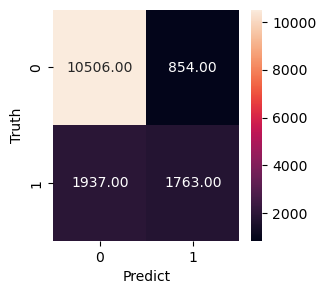

In [6]:
cm = confusion_matrix(test_y, test_prediction)

plt.figure(figsize=(3, 3))
sn.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predict')
plt.ylabel('Truth')

In [7]:
start_time = datetime.now()

#Multinomial Naive Bayes algorithm
Mmodel = MultinomialNB()

# train the model
Mmodel.fit(train_x, train_y)

# Do the prediction for the test data
test_prediction = Mmodel.predict(test_x)

# calculate the accuracy
accuracy = accuracy_score(test_y, test_prediction)

end_time = datetime.now()

time_taken_for_execution = end_time - start_time

print(f"Time Take for execution: {time_taken_for_execution}")
print(f"Accuracy: {accuracy} ")

Time Take for execution: 0:00:00.010963
Accuracy: 0.7800796812749003 


Text(8.222222222222223, 0.5, 'Truth')

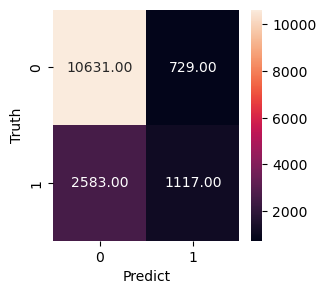

In [8]:
cm = confusion_matrix(test_y, test_prediction)

plt.figure(figsize=(3, 3))
sn.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel('Predict')
plt.ylabel('Truth')
